In [1]:
import numpy as np
import cv2
import tensorflow as tf
import tensorflow.keras
import numpy as np
from tensorflow.keras.models import Sequential, load_model
import os
from matplotlib import pyplot as plt
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from google.colab.patches import cv2_imshow
from base64 import b64decode, b64encode
from PIL import Image
import io
import html
import time
import imageio
from skimage.transform import resize
from IPython.display import HTML
import random
%matplotlib inline

In [ ]:
religion_and_science = ['chris_evans', 'chris_hemsworth', 'scarlett_johansson']
physics_2_ap = ['mark ruffalo', 'robert downy jr', 'jermey_renner']
calculus_ap_ab = ['mark ruffalo', 'robert downy jr', 'scarlett_johansson']
english_4_the_frontier = ['jermey_renner', 'mark_ruffalo', 'scarlett_johansson', 'elizabeth_olsen']
us_history_ap = ['chris_evans', 'chris_hemsworth', 'elizabeth_olsen']
ai_and_robotics = ['mark_ruffalo', 'robert downy jr', 'elizabeth_olsen']
free = ''

blocks_dict = {'A': 'us_history_ap',
               'B': 'english_4_the_frontier',
               'C': 'physics_2_ap',
               'D': 'free',
               'E': 'ai_and_robotics',
               'F': 'calculus_ap_ab',
               'G': 'religion_and_science'}

class_dict = {'us_history_ap':us_history_ap,
              'english_4_the_frontier': english_4_the_frontier,
              'physics_2_ap': physics_2_ap,
              'free':free,
              'ai_and_robotics': ai_and_robotics,
              'calculus_ap_ab': calculus_ap_ab,
              'religion_and_science':religion_and_science}

blocks_schedule = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [ ]:
def create_schedule(day):
    if day > 5:
      print('error not a valid day type: days are 1-5')
    schedule = blocks_schedule.copy()
    for i in range(day-1):
        block = schedule.pop(-1)
        schedule.insert(0, block)
    return schedule

In [ ]:
print(create_schedule(5))
for i in create_schedule(5):
  print(blocks_dict[i], class_dict[blocks_dict[i]])

In [2]:
model = load_model('/content/drive/MyDrive/Coding/Q3_Project/models/new_model.h5')
# loads the model

In [3]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename
# allows for google colab to use the web cam
# code provided by google

<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 24ms/step
Scarlett Johannson


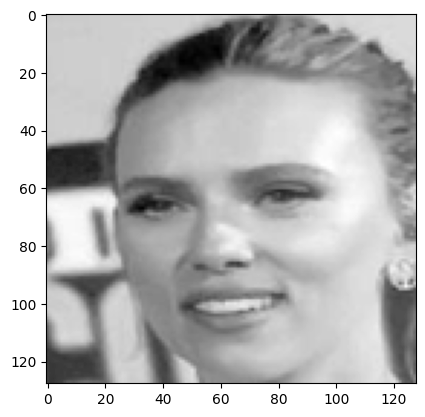

In [5]:
### camera faces
while True:
  filename = take_photo()

  face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
  # loads the face detection data provided by open cv

  img = Image.open("photo.jpg")
  img.save("photo.png")
  # converts jpg = png

  img = cv2.imdecode(np.fromfile('photo.png', dtype=np.uint8), cv2.IMREAD_UNCHANGED)
  # makes the image usable with opencv

  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  # coverts the images to gray scale

  faces = face_cascade.detectMultiScale(gray, 1.3, 5)
  # detects the images of
  for (x, y, w, h) in faces:
    x -= 10
    y -= 50
    w += 20
    h += 70
    # makes the face bigger

    img = gray[y:y + h, x:x + w]
    # gets the face from the image

    img = Image.fromarray(img)
    # cretes a image from the array so it can be resized
    img = img.resize((128, 128))

    data = np.array(img)
    # makes the image a numpy array

    model_out = model.predict(np.expand_dims(data, 0))
    # makes a prediction on who it is

    if np.argmax(model_out) == 0:
      my_label = 'Chris Evans'
    if np.argmax(model_out) == 1:
      my_label = 'Chris Hemsworth'
    if np.argmax(model_out) == 2:
      my_label = 'Elizabeth Olsen'
    if np.argmax(model_out) == 3:
      my_label = 'Jermey Renner'
    if np.argmax(model_out) == 4:
      my_label = 'Mark Ruffalo'
    if np.argmax(model_out) == 5:
      my_label = 'Robert Downey Jr'
    if np.argmax(model_out) == 6:
      my_label = 'Scarlett Johannson'

    plt.imshow(data, cmap='gray')
    # shows the image on grayscale
    print(my_label)
  break